In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [95]:
data = pd.read_excel(r'/home/sinbad/Desktop/DATASET.xlsx')
data.isna().sum().sort_values(ascending=False)

Sales            99
Pharmacy Name     0
Product Code      0
Product Name      0
Month             0
Year              0
dtype: int64

In [96]:
data['Month'] = pd.to_datetime(data['Month'], format='%B').dt.month
data['Timeline'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str),format='%Y-%m')


In [97]:
data.dropna(subset=['Sales'])

,Pharmacy Name,Product Code,Product Name,Month,Year,Sales,Timeline
0,TEMEKE PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,10,2023,577098.0,2023-10-01
1,TEMEKE PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,2,2024,1005058.0,2024-02-01
2,UBUNGO PHARMACY,10010194AC,LEVONORGESTREL IMPLANT 75MG,2,2023,436704.0,2023-02-01
5,TEMEKE PHARMACY,10010108AC,CONDOMS,7,2023,789000.0,2023-07-01
6,UBUNGO PHARMACY,10010108AC,CONDOMS,5,2024,843244.0,2024-05-01
...,...,...,...,...,...,...,...
443,KINONDONI PHARMACY,40030134AC,Copper T IUD,1,2023,48.2,2023-01-01
444,KINONDONI PHARMACY,10010108AC,CONDOMS,1,2023,787956.0,2023-01-01
445,KINONDONI PHARMACY,10010106AC,LEVONORGESTREL 0.15MG + ETHINYLESTRADIOL 0.03 ...,1,2023,552827.0,2023-01-01
446,KINONDONI PHARMACY,10010353AC,LEVONORGESTREL TABLETS 0.75 mg (2TB),1,2023,434411.0,2023-01-01


DATA VISUALISATION OF TIME VS KEYFEATURES

<Axes: xlabel='Timeline', ylabel='Sales'>

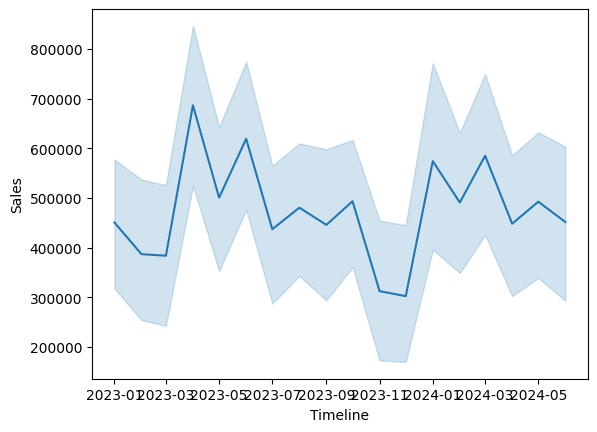

In [98]:
# sales vs time for each 
sns.lineplot(x='Timeline', y='Sales', data=data)

In [99]:
data = data.dropna()
data.isna().sum()

Pharmacy Name    0
Product Code     0
Product Name     0
Month            0
Year             0
Sales            0
Timeline         0
dtype: int64

<Axes: xlabel='Timeline', ylabel='Sales'>

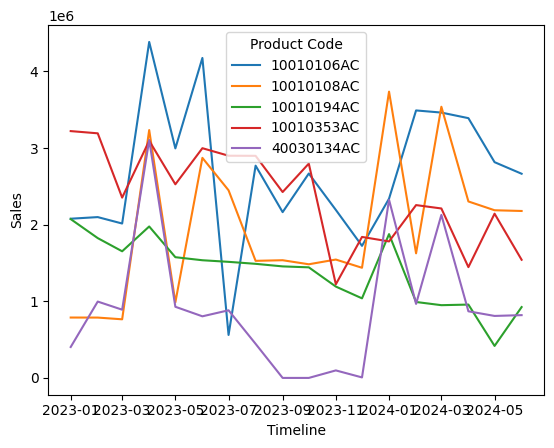

In [100]:
sales_trend = data.groupby(['Timeline','Product Code'])['Sales'].sum().reset_index()
sns.lineplot(y='Sales',x='Timeline',hue='Product Code', data=sales_trend)

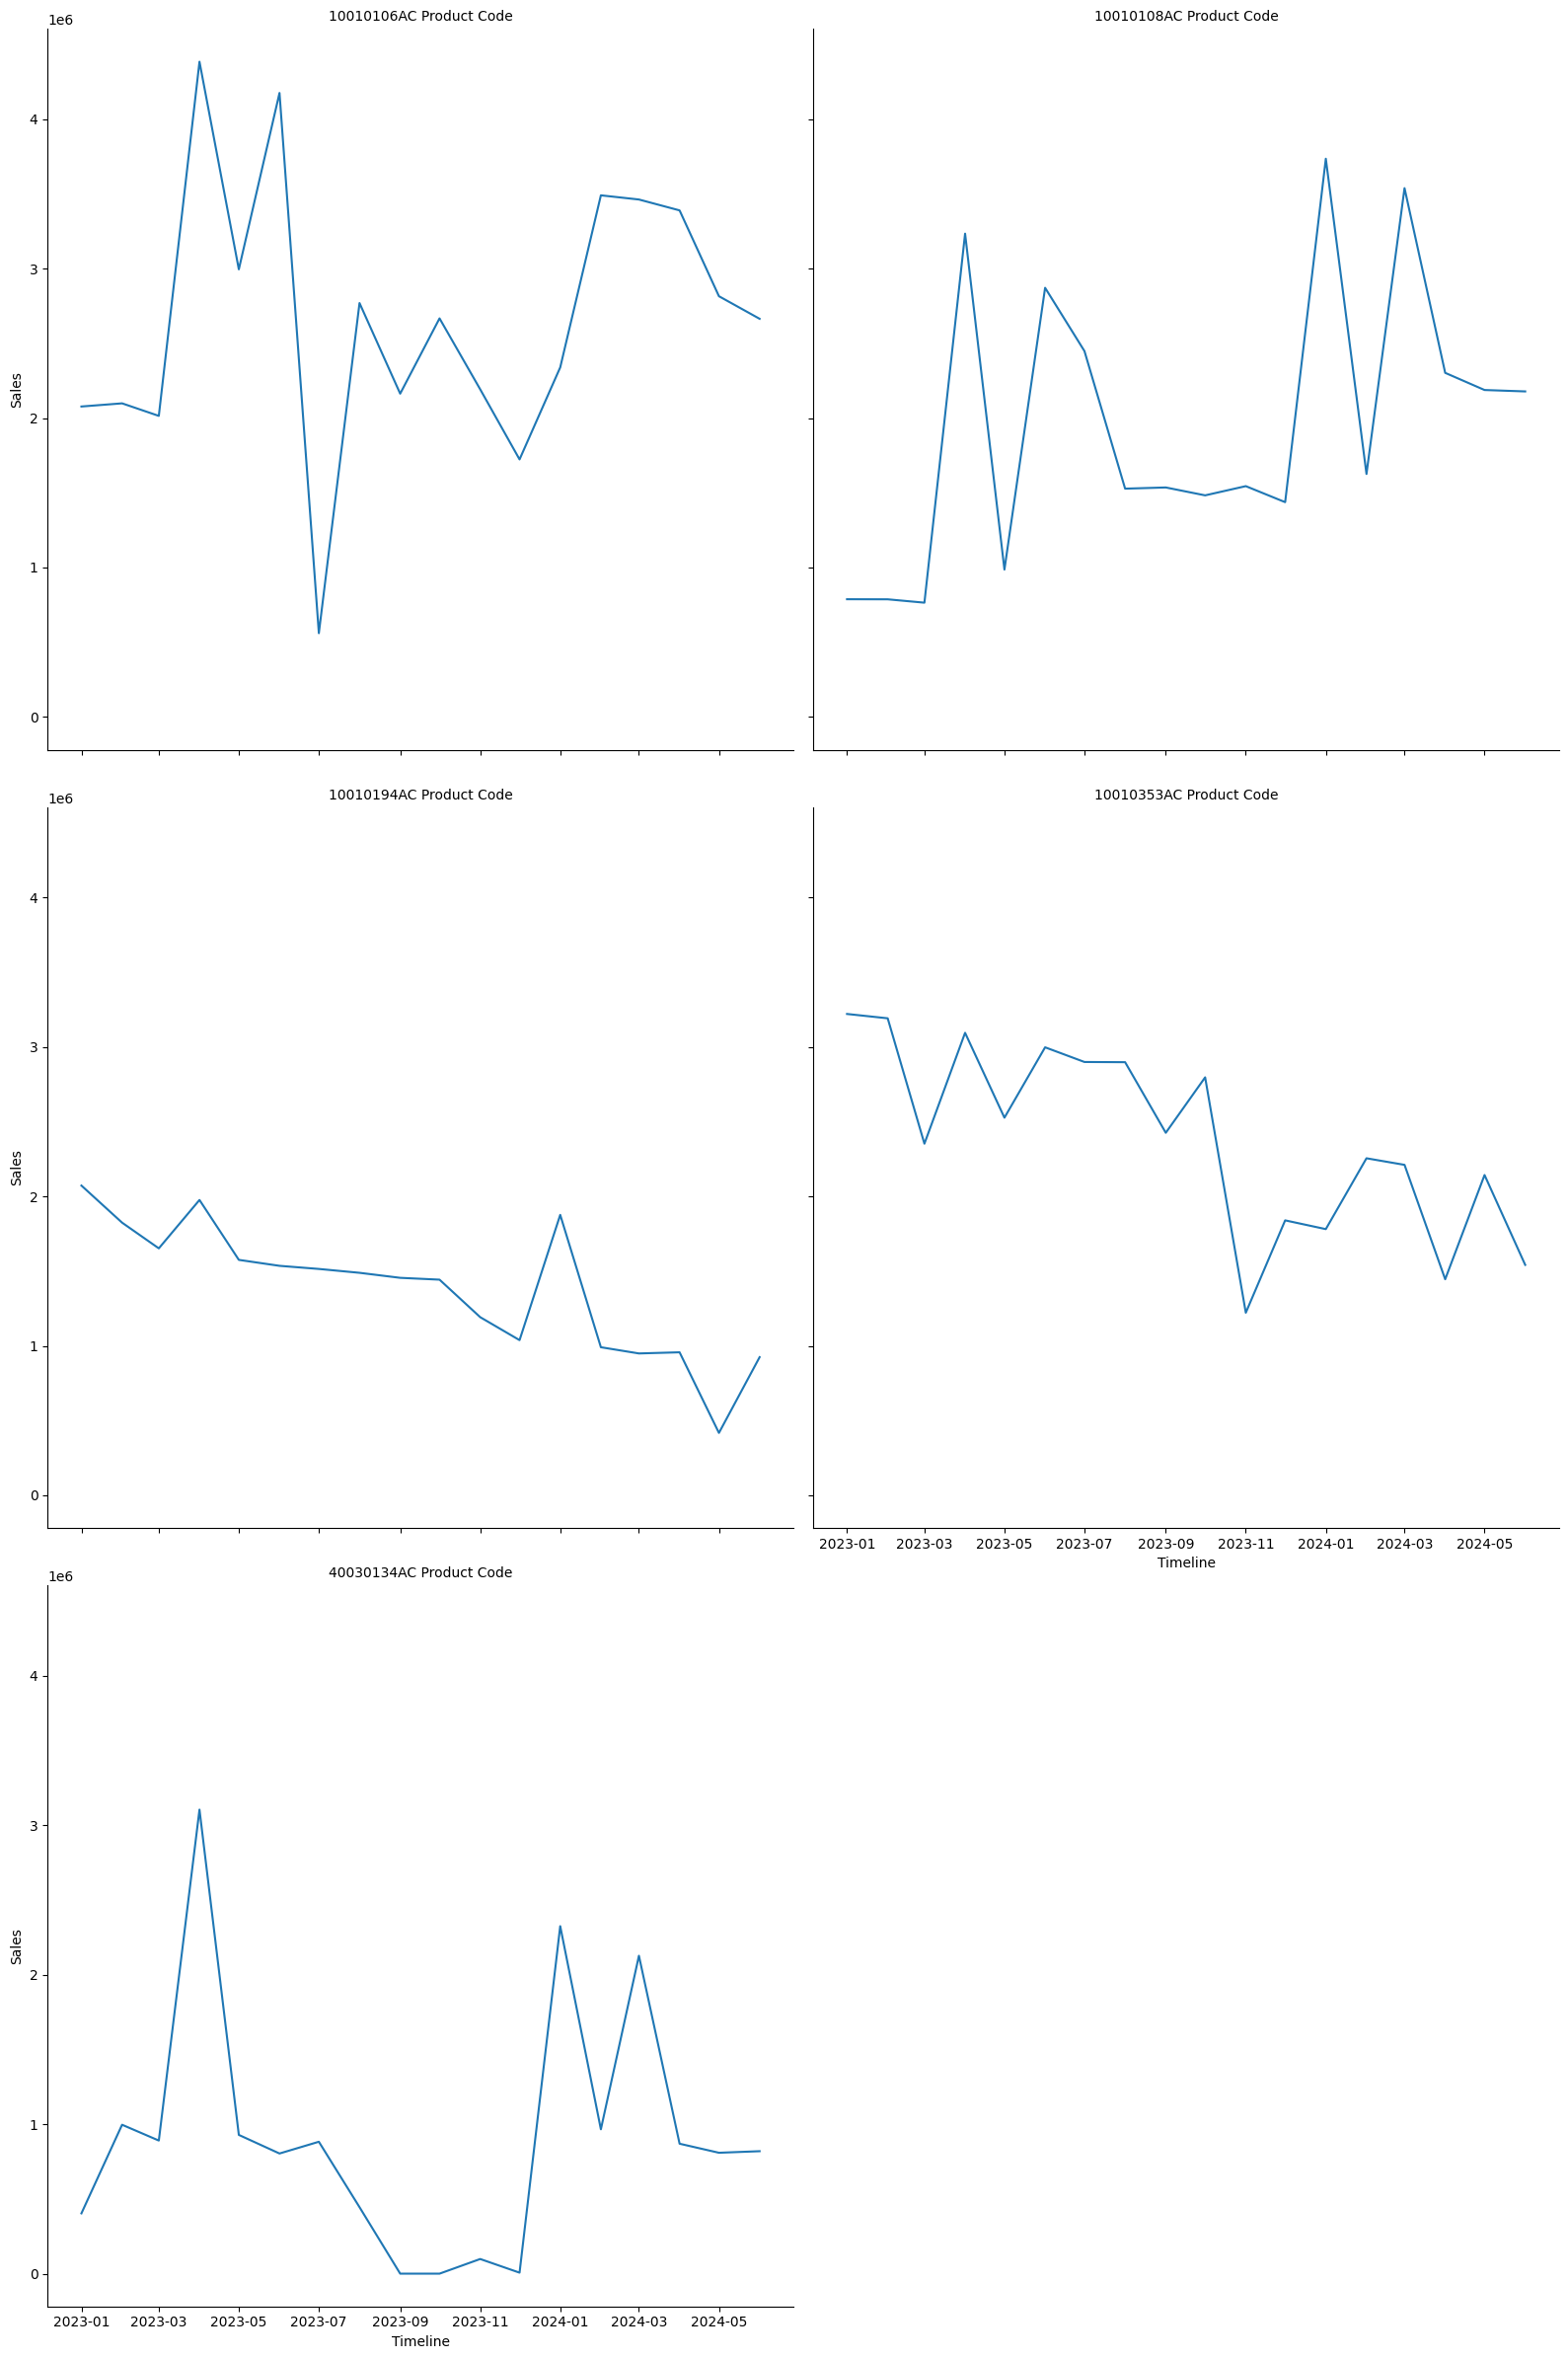

In [101]:
g = sns.FacetGrid(sales_trend, col='Product Code', col_wrap=2, height=8)

# Map the lineplot onto the grid
g.map(sns.lineplot, 'Timeline', 'Sales')

# Adjust the titles and layout
g.set_titles(col_template="{col_name} Product Code")
g.set_axis_labels("Timeline", "Sales")
g.fig.tight_layout()

# Show the plot
plt.show()

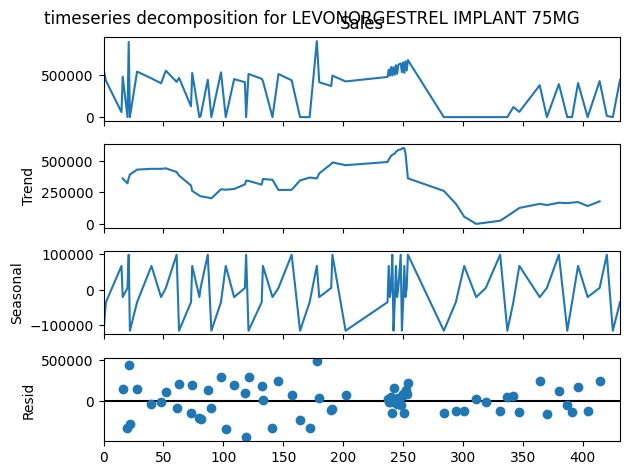

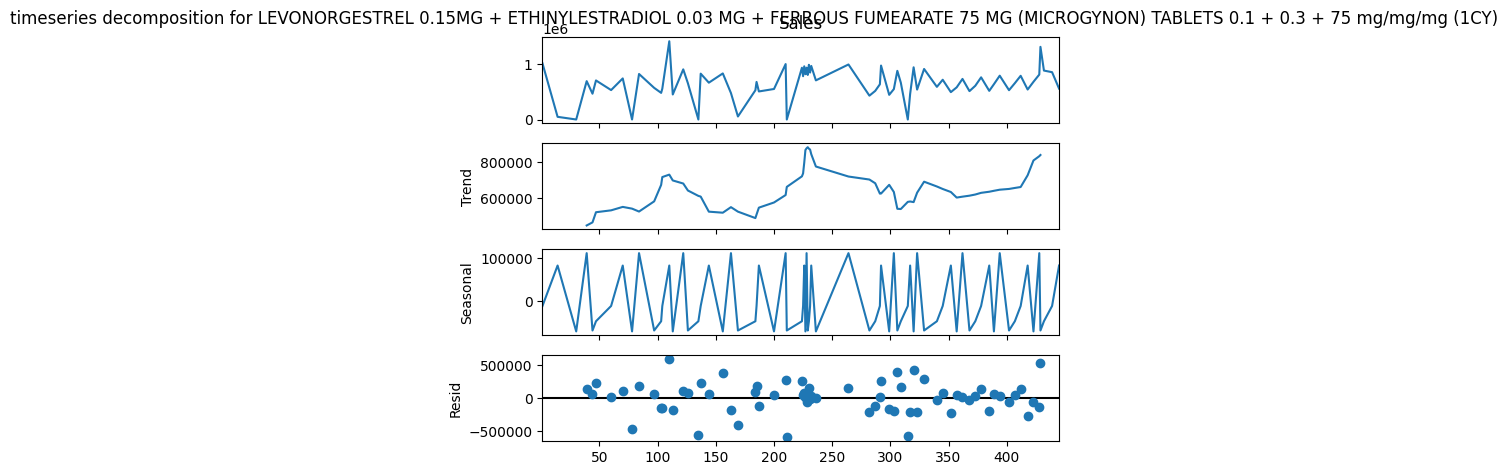

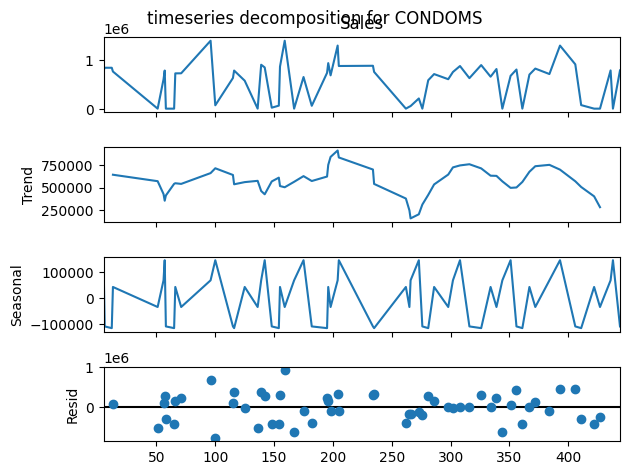

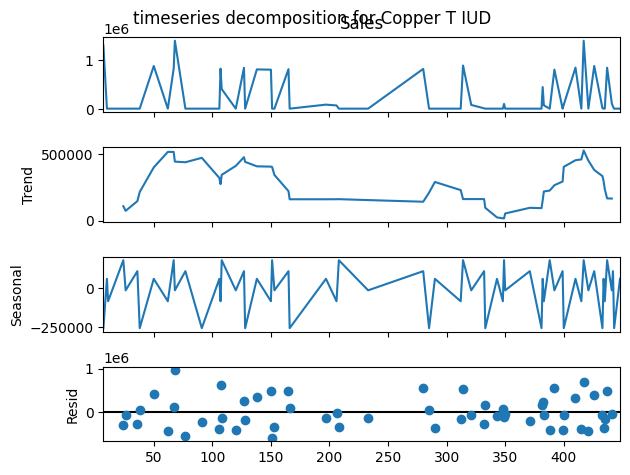

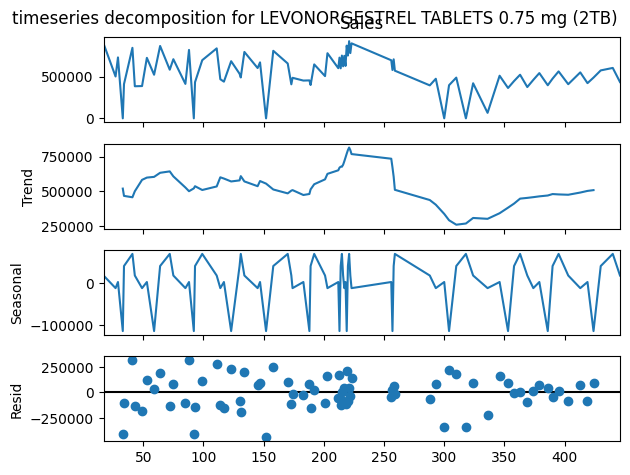

In [106]:

for product in data['Product Name'].unique():
    subset = data[data['Product Name']==product]
    decompositional = seasonal_decompose(subset['Sales'], model = 'additive', period=6)
    decompositional.plot()
    plt.suptitle(f'timeseries decomposition for {product}')
    plt.show()